In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# === Load Data ===
train_csv = r"C:\Users\marcm\Desktop\spring 2025\machineLearning\project\leave_one_out\train.csv"
test_csv = r"C:\Users\marcm\Desktop\spring 2025\machineLearning\project\leave_one_out\test.csv"

train_data = pd.read_csv(train_csv, header=None)
test_data = pd.read_csv(test_csv, header=None)

# === Split Features and Labels ===
X = train_data.iloc[:, :-1].values
y = train_data.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_final_test = test_data.iloc[:, :-1].values
y_final_test = test_data.iloc[:, -1].values

clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
clf.fit(x_train, y_train)

# === Predict on Test Data ===
y_pred = clf.predict(x_test)

# === Evaluation ===
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))


 Accuracy: 0.9390656736628301

 Classification Report:

              precision    recall  f1-score   support

           1     0.9848    0.9867    0.9858       527
           2     0.9533    0.9635    0.9584       466
           3     0.8993    0.9154    0.9073       449
           4     0.9193    0.9629    0.9406       485
           5     0.9530    0.9246    0.9386       504
           6     0.9170    0.8858    0.9011       499
           7     1.0000    0.7917    0.8837        24

    accuracy                         0.9391      2954
   macro avg     0.9467    0.9186    0.9308      2954
weighted avg     0.9393    0.9391    0.9389      2954



In [18]:
from sklearn.metrics import f1_score
y_final_pred = clf.predict(X_final_test)
print("Final Test Accuracy:", accuracy_score(y_final_test, y_final_pred))
print("Final Test F1 Score:", f1_score(y_final_test, y_final_pred, average='weighted'))
print("\n Final Test Classification Report:\n")
print(classification_report(y_final_test, y_final_pred, digits=4))

Final Test Accuracy: 0.8891820580474934
Final Test F1 Score: 0.8854454689730826

 Final Test Classification Report:

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        65
           2     1.0000    0.9848    0.9924        66
           3     1.0000    0.7000    0.8235        60
           4     0.9737    0.6167    0.7551        60
           5     0.7326    1.0000    0.8456        63
           6     0.7831    1.0000    0.8784        65

    accuracy                         0.8892       379
   macro avg     0.9149    0.8836    0.8825       379
weighted avg     0.9142    0.8892    0.8854       379



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\n KNN Classification Report:\n")
print(classification_report(y_test, y_pred_knn, digits=4))

KNN Accuracy: 0.9339878131347326

 KNN Classification Report:

              precision    recall  f1-score   support

           1     0.9812    0.9905    0.9858       527
           2     0.9761    0.9635    0.9698       466
           3     0.9044    0.9065    0.9055       449
           4     0.9048    0.9402    0.9221       485
           5     0.9273    0.9107    0.9189       504
           6     0.9045    0.8918    0.8981       499
           7     1.0000    0.8750    0.9333        24

    accuracy                         0.9340      2954
   macro avg     0.9426    0.9255    0.9334      2954
weighted avg     0.9342    0.9340    0.9340      2954



In [23]:
y_final_pred_knn = knn.predict(X_final_test)
print("Final Test KNN Accuracy:", accuracy_score(y_final_test, y_final_pred_knn))
print("Final Test KNN F1 Score:", f1_score(y_final_test, y_final_pred_knn, average='weighted'))
print("\n Final Test KNN Classification Report:\n")
print(classification_report(y_final_test, y_final_pred_knn, digits=4))

Final Test KNN Accuracy: 0.8918205804749341
Final Test KNN F1 Score: 0.890333134669945

 Final Test KNN Classification Report:

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        65
           2     0.9848    0.9848    0.9848        66
           3     1.0000    0.7333    0.8462        60
           4     0.9286    0.6500    0.7647        60
           5     0.7439    0.9683    0.8414        63
           6     0.8101    0.9846    0.8889        65
           7     0.0000    0.0000    0.0000         0

    accuracy                         0.8918       379
   macro avg     0.7811    0.7602    0.7609       379
weighted avg     0.9109    0.8918    0.8903       379



c:\Users\marcm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marcm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marcm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

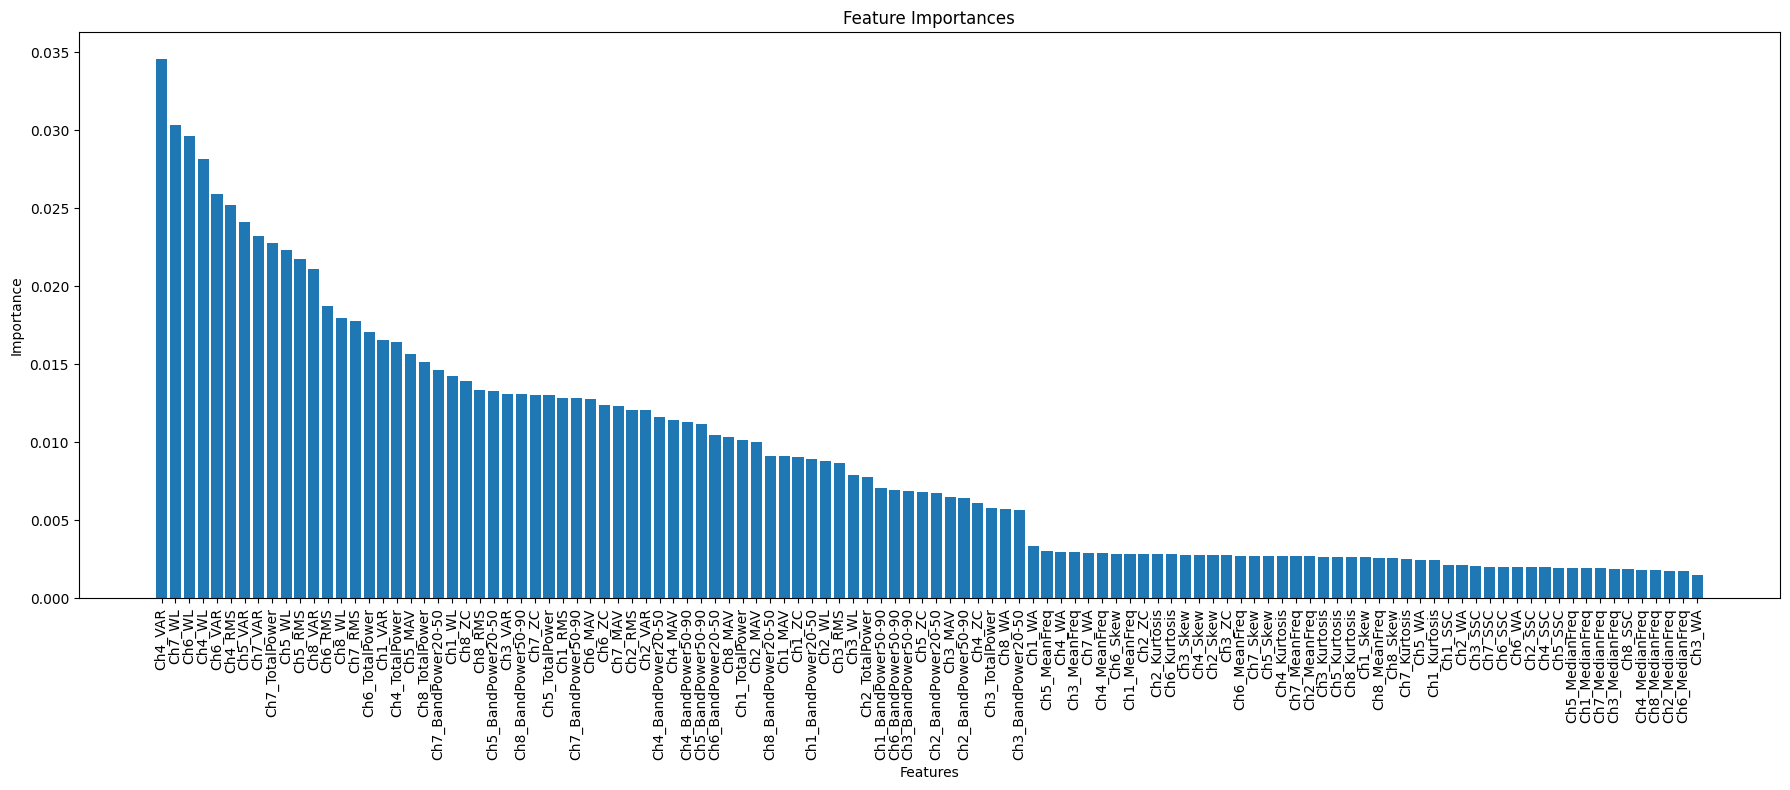

In [21]:
import numpy as np
import matplotlib.pyplot as plt
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Optional: if you want pretty feature names
channels = [f"Ch{i+1}" for i in range(8)]
feature_types = ["MAV", "RMS", "WL", "ZC", "SSC", "WA", "VAR", "Skew", "Kurtosis", 
                 "MedianFreq", "MeanFreq", "TotalPower", "BandPower20-50", "BandPower50-90"]
feature_names = []
for ch in channels:
    for feat in feature_types:
        feature_names.append(f"{ch}_{feat}")

sorted_feature_names = [feature_names[i] for i in indices]

# Plot
plt.figure(figsize=(18, 8))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [31]:
# 1. Top 30 important features
top_k = 30
top_features_idx = indices[:top_k]

# 2. Reduce datasets
X_train_reduced = x_train[:, top_features_idx]  # training set (80%)
X_test_reduced = x_test[:, top_features_idx]    # validation set (20%)
X_final_test_reduced = X_final_test[:, top_features_idx]  # unseen subject!

# 3. Retrain Random Forest
model_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
model_reduced.fit(X_train_reduced, y_train)

# 4. Predict on 20% holdout
y_pred_reduced = model_reduced.predict(X_test_reduced)

print("✅ Validation (20%) Accuracy on Reduced Features:", accuracy_score(y_test, y_pred_reduced))
print("\n📄 Classification Report (Reduced Features on 20%):\n")
print(classification_report(y_test, y_pred_reduced, digits=4))

✅ Validation (20%) Accuracy on Reduced Features: 0.9258632362897766

📄 Classification Report (Reduced Features on 20%):

              precision    recall  f1-score   support

           1     0.9867    0.9867    0.9867       527
           2     0.9551    0.9592    0.9572       466
           3     0.8511    0.8909    0.8705       449
           4     0.9109    0.9485    0.9293       485
           5     0.9476    0.9325    0.9400       504
           6     0.8950    0.8537    0.8738       499
           7     1.0000    0.5000    0.6667        24

    accuracy                         0.9259      2954
   macro avg     0.9352    0.8674    0.8892      2954
weighted avg     0.9266    0.9259    0.9253      2954



In [32]:
# 5. Predict on final unseen subject
y_final_pred_reduced = model_reduced.predict(X_final_test_reduced)

print("\n\n🎯 Final Test on Unseen Subject (Reduced Features):")
print("✅ Final Accuracy:", accuracy_score(y_final_test, y_final_pred_reduced))
print("✅ Final F1 Score:", f1_score(y_final_test, y_final_pred_reduced, average='weighted'))
print("\n📄 Final Classification Report (Reduced Features on Test):\n")
print(classification_report(y_final_test, y_final_pred_reduced, digits=4))



🎯 Final Test on Unseen Subject (Reduced Features):
✅ Final Accuracy: 0.9023746701846965
✅ Final F1 Score: 0.9003610597821596

📄 Final Classification Report (Reduced Features on Test):

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        65
           2     1.0000    0.9848    0.9924        66
           3     0.9767    0.7000    0.8155        60
           4     0.9565    0.7333    0.8302        60
           5     0.7975    1.0000    0.8873        63
           6     0.7778    0.9692    0.8630        65

    accuracy                         0.9024       379
   macro avg     0.9181    0.8979    0.8981       379
weighted avg     0.9177    0.9024    0.9004       379



In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# === 1. Top 30 important features (already computed from Random Forest)
top_k = 30
top_features_idx = indices[:top_k]

# === 2. Reduce datasets
X_train_reduced = x_train[:, top_features_idx]            # Train (80%)
X_test_reduced = x_test[:, top_features_idx]              # Validation (20%)
X_final_test_reduced = X_final_test[:, top_features_idx]  # Final unseen subject

# === 3. Retrain KNN
knn_reduced = KNeighborsClassifier(n_neighbors=7)
knn_reduced.fit(X_train_reduced, y_train)

# === 4. Predict on 20% holdout
y_pred_knn_reduced = knn_reduced.predict(X_test_reduced)

print("🤖 Validation (20%) Accuracy for KNN on Reduced Features:", accuracy_score(y_test, y_pred_knn_reduced))
print("\n📄 Classification Report (KNN Reduced Features on 20% Validation):\n")
print(classification_report(y_test, y_pred_knn_reduced, digits=4))

🤖 Validation (20%) Accuracy for KNN on Reduced Features: 0.9048747461069736

📄 Classification Report (KNN Reduced Features on 20% Validation):

              precision    recall  f1-score   support

           1     0.9849    0.9905    0.9877       527
           2     0.9754    0.9356    0.9551       466
           3     0.8294    0.8664    0.8475       449
           4     0.8724    0.9443    0.9069       485
           5     0.9350    0.8849    0.9093       504
           6     0.8316    0.8216    0.8266       499
           7     0.9231    0.5000    0.6486        24

    accuracy                         0.9049      2954
   macro avg     0.9074    0.8491    0.8688      2954
weighted avg     0.9064    0.9049    0.9046      2954



In [34]:

# === 5. Predict on final unseen subject
y_final_pred_knn_reduced = knn_reduced.predict(X_final_test_reduced)

print("\n\n🎯 Final Test on Unseen Subject (KNN Reduced Features):")
print("✅ Final Accuracy:", accuracy_score(y_final_test, y_final_pred_knn_reduced))
print("✅ Final F1 Score:", f1_score(y_final_test, y_final_pred_knn_reduced, average='weighted'))
print("\n📄 Final Classification Report (KNN Reduced Features on Test):\n")
print(classification_report(y_final_test, y_final_pred_knn_reduced, digits=4))




🎯 Final Test on Unseen Subject (KNN Reduced Features):
✅ Final Accuracy: 0.8970976253298153
✅ Final F1 Score: 0.8978871396437725

📄 Final Classification Report (KNN Reduced Features on Test):

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        65
           2     0.9841    0.9394    0.9612        66
           3     0.9592    0.7833    0.8624        60
           4     0.9000    0.7500    0.8182        60
           5     0.7973    0.9365    0.8613        63
           6     0.8052    0.9538    0.8732        65
           7     0.0000    0.0000    0.0000         0

    accuracy                         0.8971       379
   macro avg     0.7780    0.7662    0.7681       379
weighted avg     0.9078    0.8971    0.8979       379



c:\Users\marcm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marcm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marcm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita